In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Read RLQ analysis outputs

In [24]:
# coefficients (loadings) for the environmental variables (phenotypes)
df_l1 = pd.read_csv('output/l1_loadings_of_phenotypes.csv', index_col=0)

# coefficients (loadings) for the traits (pathways)
df_c1 = pd.read_csv('output/c1_loadings_of_pathways.csv', index_col=0)

# scores of species (genes)
df_lQ = pd.read_csv('output/lQ_scores_of_genes.csv', index_col=0)

# scores of sites (strains)
df_lR = pd.read_csv('output/lR_scores_of_strains.csv', index_col=0)

# Plot the four tables in a single graph

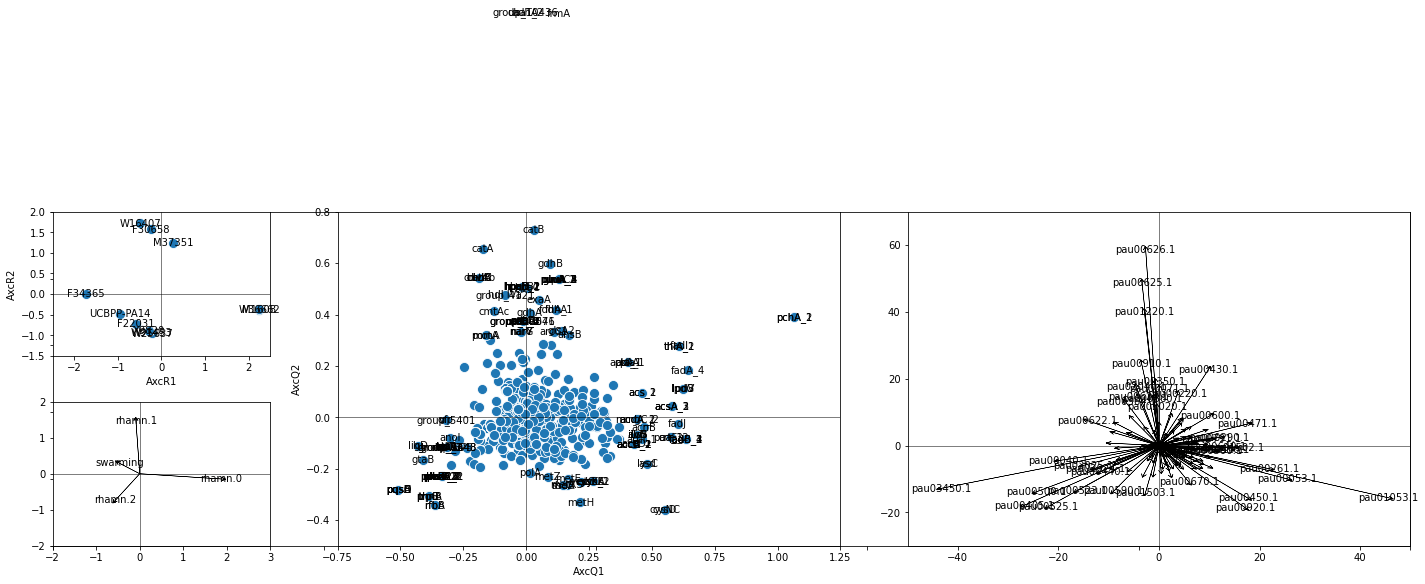

In [27]:
fig, ax = plt.subplots(figsize=(20, 10))

ax.set_xticklabels('')
ax.set_yticklabels('')

# create plot grids
gs = fig.add_gridspec(2,5,figure=fig)

# Plot projection of strains on new RLQ axes
ax1 = fig.add_subplot(gs[0, 0])
_ = sns.scatterplot(x='AxcR1', y='AxcR2', data=df_lR, ax=ax1, s=100)
_ = ax1.set_xlim([-2.5,2.5])
_ = ax1.set_ylim([-1.5,2])
_ = ax1.plot([-2.5,2.5],[0,0],'-',color='black',linewidth=0.5)
_ = ax1.plot([0,0],[-1.5,2],'-',color='black',linewidth=0.5)
texts = [ax1.text(df_lR.loc[strain,'AxcR1'], df_lR.loc[strain,'AxcR2'], strain, ha='center', va='center') for strain in df_lR.index]

# Plot original axes of phenotypes on new RLQ axes
ax2 = fig.add_subplot(gs[1, 0])
_ = ax2.set_xlim([-2,3])
_ = ax2.set_ylim([-2,2])
_ = ax2.plot([-2,3],[0,0],'-',color='black',linewidth=0.5)
_ = ax2.plot([0,0],[-2,2],'-',color='black',linewidth=0.5)
for phenotype in df_l1.index:
    ax2.arrow(0,0,df_l1.loc[phenotype,'RS1'], df_l1.loc[phenotype,'RS2'], linewidth=0.5, head_width=0.1, head_length=0.1, overhang=1.0)
texts = [ax2.text(df_l1.loc[phenotype,'RS1'], df_l1.loc[phenotype,'RS2'], phenotype, ha='center', va='center') for phenotype in df_l1.index]

# Plot projection of genes on new RLQ axes
ax3 = fig.add_subplot(gs[0:2, 1:3])
_ = sns.scatterplot(x='AxcQ1', y='AxcQ2', data=df_lQ, ax=ax3, s=100)
_ = ax3.set_xlim([-0.75,1.25])
_ = ax3.set_ylim([-0.5,0.8])
_ = ax3.plot([-0.75,1.25],[0,0],'-',color='black',linewidth=0.5)
_ = ax3.plot([0,0],[-0.5,0.8],'-',color='black',linewidth=0.5)
texts = []
for gene in df_lQ.index:
    xi = df_lQ.loc[gene,'AxcQ1']
    yi = df_lQ.loc[gene,'AxcQ2']
    if xi<-0.3 or xi>0.4 or yi < -0.2 or yi>0.3:
        texts.append(ax3.text(xi, yi, gene, ha='center', va='center'))

# Plot original axes of pathways on new RLQ axes
ax4 = fig.add_subplot(gs[0:2, 3:6])
_ = ax4.set_xlim([-50,50])
_ = ax4.set_ylim([-30,70])
_ = ax4.plot([-50,50],[0,0],'-',color='black',linewidth=0.5)
_ = ax4.plot([0,0],[-30,70],'-',color='black',linewidth=0.5)
for pathway in df_c1.index:
    ax4.arrow(0,0,df_c1.loc[pathway,'CS1'], df_c1.loc[pathway,'CS2'], linewidth=0.5, head_width=1, head_length=1, overhang=1.0)
texts = []
for pathway in df_c1.index:
    xi = df_c1.loc[pathway,'CS1']
    yi = df_c1.loc[pathway,'CS2']
    if xi<-10 or xi>10 or yi < -10 or yi>10:
        texts.append(ax4.text(xi, yi, pathway, ha='center', va='center'))

plt.tight_layout()
plt.show()

fig.savefig('RLQ_analysis_plot.png', format='png', dpi=600)